<a href="https://colab.research.google.com/github/yunmiaouwu/data-245-project/blob/main/DA245_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/Shared drives/Data245/Project/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from keras.preprocessing.image import img_to_array

In [ ]:
# unzip
#!pip install unrar
#!unrar x data.rar '/content/drive/Shared drives/Data245/Project/Data'

In [ ]:
#original image instance
import cv2
from keras.preprocessing.image import img_to_array
i=0
original_image=[]
path = r'/content/drive/Shared drives/Data245/Project/Data/extracted_images/1/1_2.jpg'
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image.append(img_to_array(img))


#reduced image instance
reduced_image=[]
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    
# Data Reduction: PCA
blue,green,red = cv2.split(img)
df_blue,df_green,df_red = blue,green,red
pca_b = PCA(n_components=30)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=30)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=30)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)
blue_arr = pca_b.inverse_transform(trans_pca_b)
green_arr = pca_g.inverse_transform(trans_pca_g)
red_arr = pca_r.inverse_transform(trans_pca_r)
img_reduced= (cv2.merge((blue_arr, green_arr, red_arr)))
resized_image = img_reduced.astype('float32') / 255
reduced_image.append(img_to_array(resized_image))


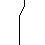

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


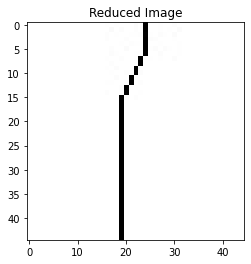

In [ ]:
fig = plt.figure() 

from google.colab.patches import cv2_imshow
img = cv2.imread(path)
# Output img with window name as 'image'
cv2_imshow(img)


plt.title("Reduced Image")
plt.imshow(np.squeeze(reduced_image))
plt.show()

In [ ]:
#Data Regularization/ Augmentation
aug = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

symbol_temp = np.array(symbol_raw)
aug.fit(symbol_temp)

#fit augented training data to the model
#model.fit(data_gen.flow(x_train, y_train, batch_size=32),...)